In [1]:
tasmia = "In the name of Allah, The most Benoficient, The most Merciful"
print(tasmia)

In the name of Allah, The most Benoficient, The most Merciful


### Import Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
sns.set_style("whitegrid")

In [4]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

In [5]:
df = load_iris()
observations = df["data"]
target = df["target"]
columns = df["feature_names"]

**Features and Target**

In [6]:
# Features 
X = pd.DataFrame(observations, columns = columns)

# Target
y = target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X[["petal length (cm)", "petal width (cm)"]],
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1146)

### LinearSVC

C:\Users\Jazi Designs\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


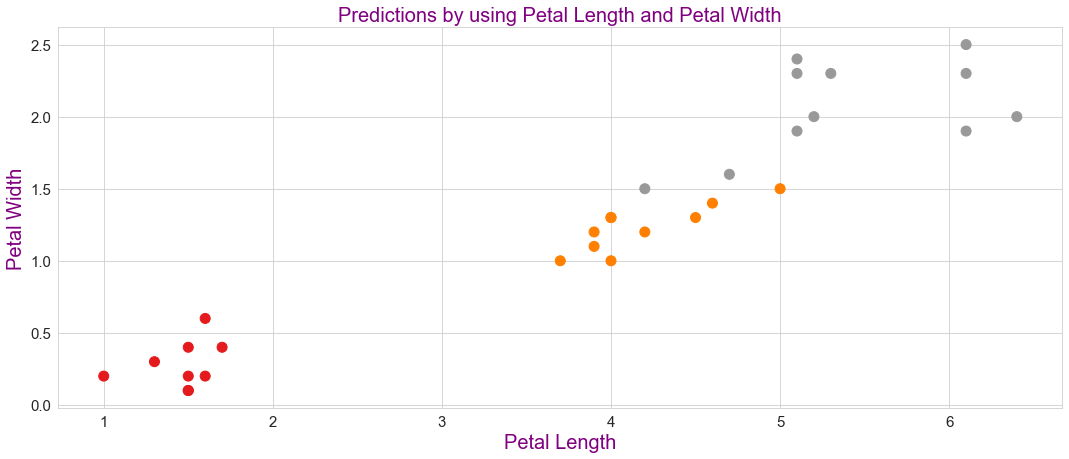

In [8]:
lsvc = LinearSVC()

lsvc.fit(X_train, y_train)

lsvc_predict = lsvc.predict(X_test)

plt.figure(figsize = (18, 7))
plt.scatter(X_test["petal length (cm)"], X_test["petal width (cm)"], c = lsvc_predict, cmap = plt.cm.Set1, s = 100)
plt.title("Predictions by using Petal Length and Petal Width", size = 20, color = "purple")
plt.xlabel("Petal Length", color = "purple", size = 20)
plt.ylabel("Petal Width", color = "purple", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()                   

### Linear Regression

In [9]:
boston = load_boston()
X = pd.DataFrame(boston["data"], columns = boston["feature_names"])
X.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
83,0.03551,25.0,4.86,0.0,0.426,6.167,46.7,5.4007,4.0,281.0,19.0,390.64,7.51


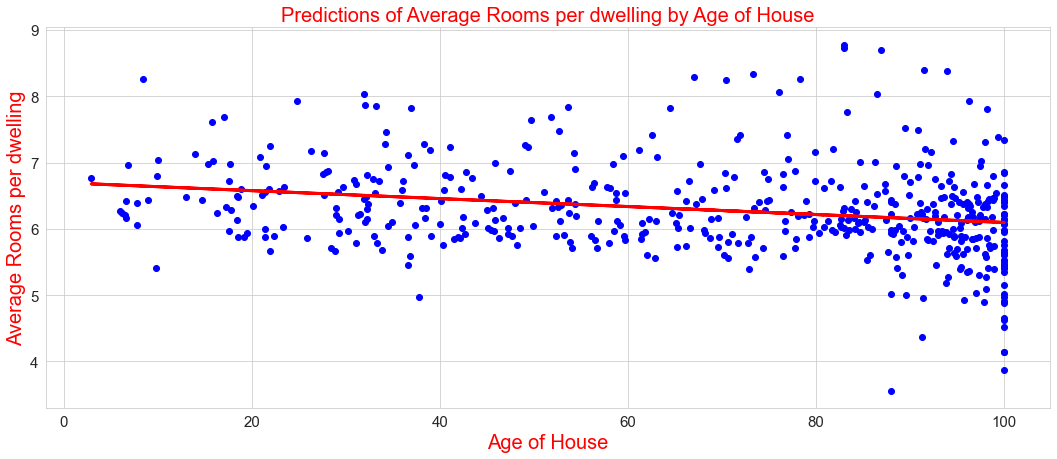

In [10]:
Xb = X[["AGE"]]
yb = X["RM"]

lr = LinearRegression().fit(Xb, yb)
pred_lr = lr.predict(Xb)

plt.figure(figsize = (18, 7))
plt.scatter(Xb, yb, color = "blue")
plt.plot(Xb, pred_lr, color = "red", linewidth = 3)
plt.title("Predictions of Average Rooms per dwelling by Age of House", color = "red", size = 20)
plt.xlabel("Age of House", color = "red", size = 20)
plt.ylabel("Average Rooms per dwelling", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Predicting Time Series Data

In [11]:
prices = pd.read_csv("prices.csv", index_col = "Date", parse_dates = ["Date"])
prices.head()

,EBAY,YAHOO
Date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


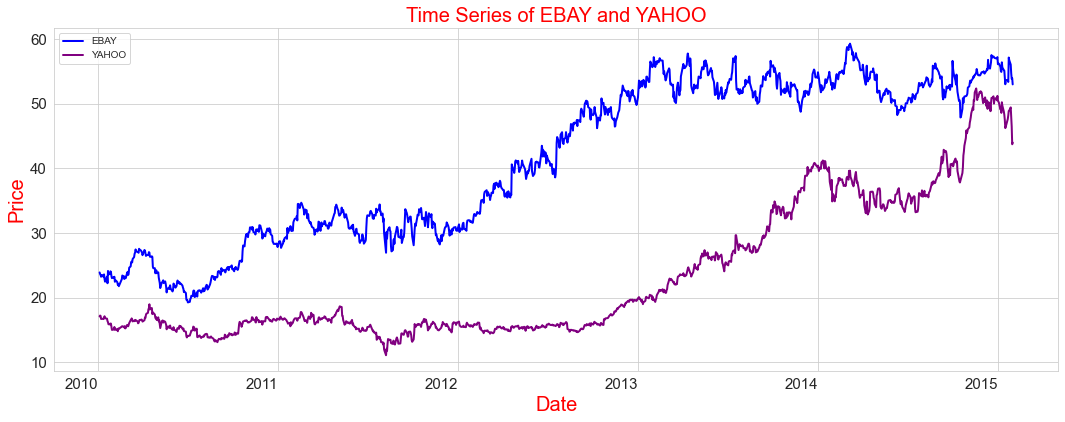

In [12]:
prices.plot(figsize = (18, 7), linewidth = 2, color = ["blue", "purple"])
plt.title("Time Series of EBAY and YAHOO", size = 20, color = "red")
plt.xlabel("Date", color = "red", size = 20)
plt.ylabel("Price", color = "red", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()  

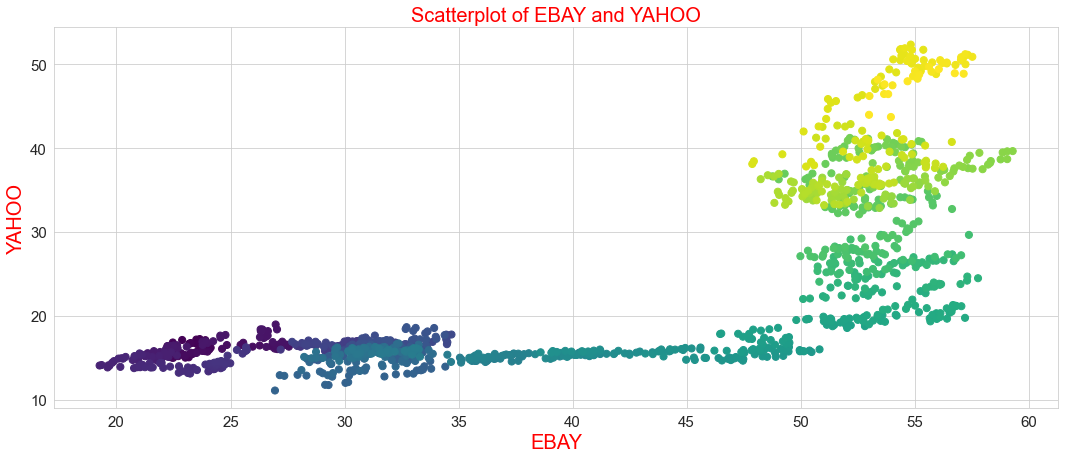

In [13]:
prices.plot.scatter("EBAY", "YAHOO", c = prices.index, cmap=plt.cm.viridis, figsize = (18, 7), s = 50)
plt.title("Scatterplot of EBAY and YAHOO", size = 20, color = "red")
plt.xlabel("EBAY", color = "red", size = 20)
plt.ylabel("YAHOO", color = "red", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()  

### Fitting a simple regression model

In [14]:
enya = pd.read_csv("enya.csv", index_col = "Date", parse_dates = ["Date"])
enya.head()

,EBAY,NVDA,YHOO,AAPL
Date,,,,
2010-01-04,23.900000,18.490000,17.100000,214.009998
2010-01-05,23.650000,18.760000,17.230000,214.379993
2010-01-06,23.500000,18.879999,17.170000,210.969995
2010-01-07,23.229998,18.510000,16.700001,210.580000
2010-01-08,23.509999,18.549999,16.700001,211.980005


In [15]:
X = enya[enya.columns.drop("AAPL")]

y = enya["AAPL"]

**Cross Validation**

In [16]:
scores = cross_val_score(Ridge(), X, y, cv = 3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


 fitting a model with raw data doesn't give great results.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = False)
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
score

-0.3380697256228935

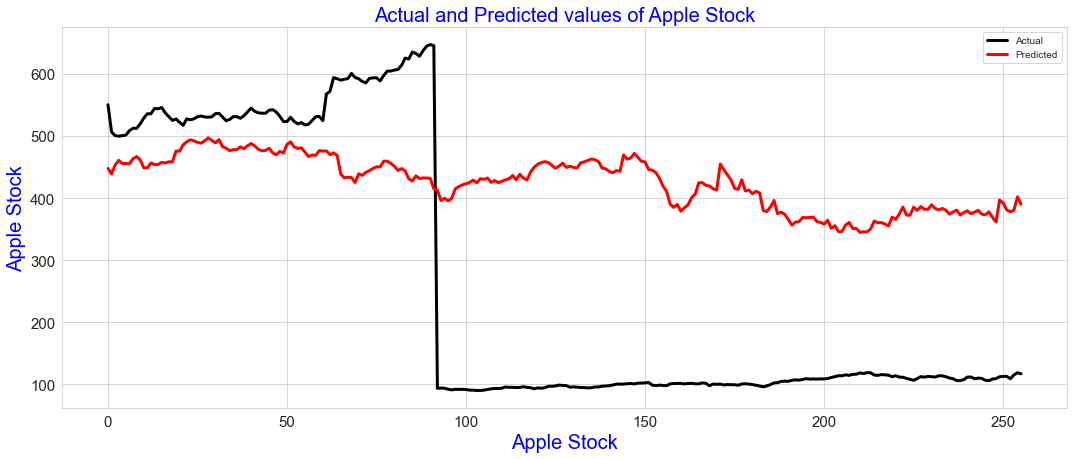

In [18]:
plt.figure(figsize=(18, 7))
plt.plot(y_test.values, color='k', lw=3, label = "Actual")
plt.plot(predictions, color='r', lw=3, label = "Predicted")
plt.legend()
plt.title("Actual and Predicted values of Apple Stock", size = 20, color = "blue")
plt.xlabel("Apple Stock", color = "blue", size = 20)
plt.ylabel("Apple Stock", color = "blue", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()  

### Visualizing messy data

In [19]:
messy = pd.read_csv("messy.csv", index_col = "Date", parse_dates = ["Date"])
messy.head()

,EBAY,NVDA,YHOO
Date,,,
2010-01-04,23.900000,18.490000,17.100000
2010-01-05,23.650000,18.760000,17.230000
2010-01-06,23.500000,18.879999,17.170000
2010-01-07,23.229998,18.510000,16.700001
2010-01-08,23.509999,18.549999,16.700001


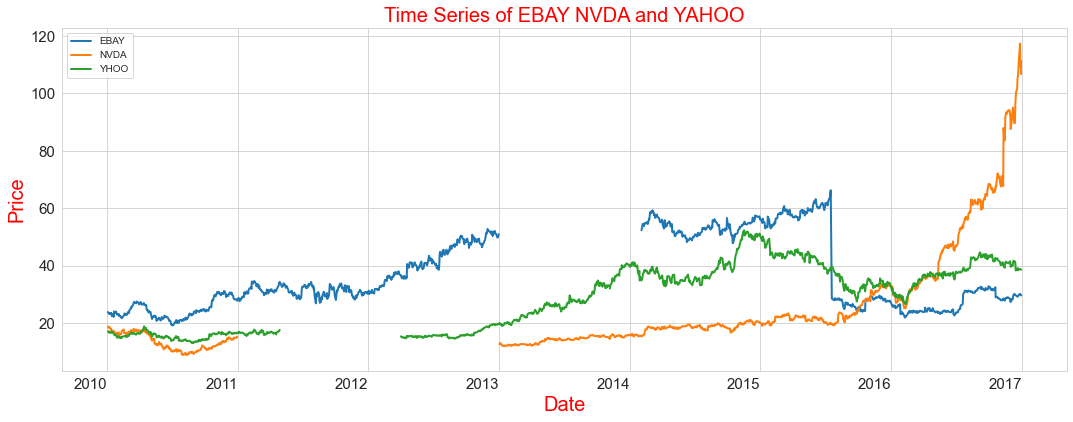

In [20]:
messy.plot(figsize = (18, 7), linewidth = 2)
plt.title("Time Series of EBAY NVDA and YAHOO", size = 20, color = "red")
plt.xlabel("Date", color = "red", size = 20)
plt.ylabel("Price", color = "red", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()  

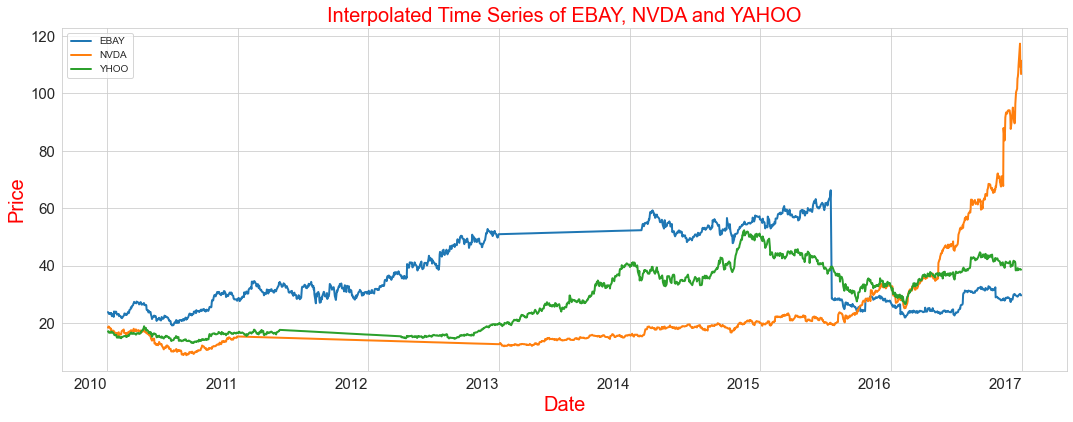

In [21]:
messy_interpolate = messy.interpolate("linear")
messy_interpolate.plot(figsize = (18, 7), linewidth = 2)
plt.title("Interpolated Time Series of EBAY, NVDA and YAHOO", size = 20, color = "red")
plt.xlabel("Date", color = "red", size = 20)
plt.ylabel("Price", color = "red", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()  

### Transforming raw data

In [22]:
def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]
    
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

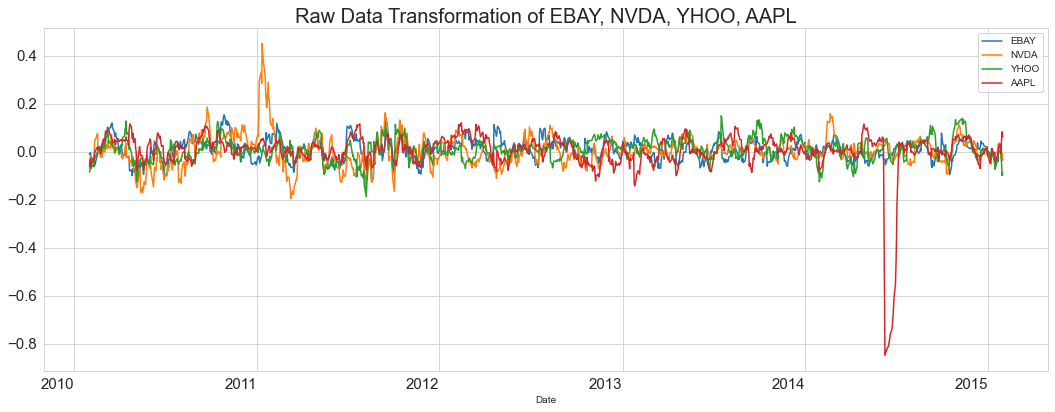

In [23]:
prices_perc = enya.rolling(20).apply(percent_change)
prices_perc.plot(figsize = (18, 7))
plt.title("Raw Data Transformation of EBAY, NVDA, YHOO, AAPL", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

In [24]:
def replaces_outliers(series):
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    series[this_mask] = np.nanmedian(series)
    return series

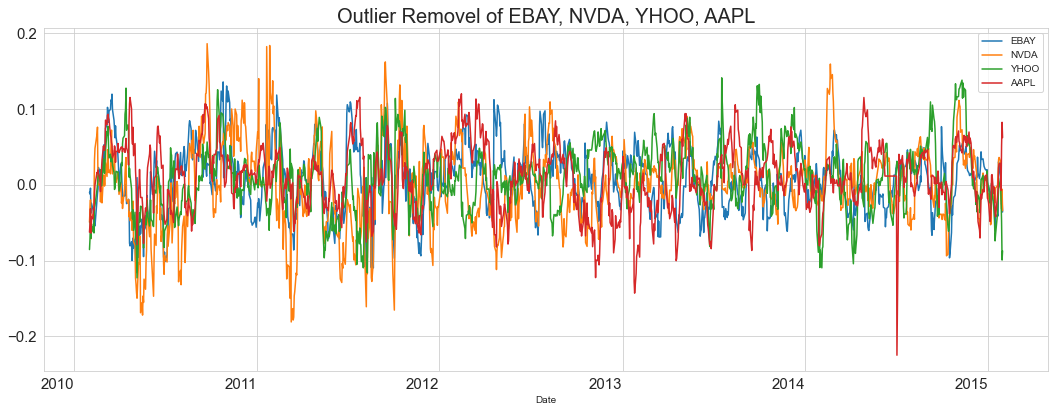

In [25]:
prices_enya = prices_perc.apply(replaces_outliers)
prices_enya.plot(figsize = (18, 7))
plt.title("Outlier Removel of EBAY, NVDA, YHOO, AAPL", size = 20)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()